# Figure 4


In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style("white")
%matplotlib inline
#pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')


----
## I. ACS raw dataset import  <a id='imp'></a>


In [2]:
path = '/global/scratch/users/cristina_crespo/p1_data/'
acs_data_raw = pd.read_csv(path +'out_final/ct_enhanced_fig_plotting_results.csv')


In [3]:
#FILTER OUT ALASKA AND HAWAII
acs_data_raw = acs_data_raw[ ~acs_data_raw.state.isin([2, 15])]
acs_data_raw = acs_data_raw[(acs_data_raw.Race_majority !='Not Hispanic or Latino: American Indian and Alaska Native')  & (acs_data_raw.Race_majority !='Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander')]


In [4]:
acs_data_raw.rename(columns = {'Low Income High Cost (LIHC) - LI': 'Low Income High Cost (LIHC)'}, inplace = True)


In [5]:
palette = sns.color_palette("Set2")

econ_col = palette[2]
physical_col= 'lightgrey'
beh_col = palette[3]#'coral'

----
## II. Binary indicators plot  <a id='bin'></a>



Set aside housholds demographics

Establish palette

In [6]:
#race
palette_race ={ "Not Hispanic or Latino: Asian alone": 'lightpink', 
               "No majority": 'lightgrey',
               "Not Hispanic or Latino: Black or African American": palette[0],
               "Hispanic or Latino":'#baeae4',  
               "Not Hispanic or Latino: White": '#80649e'}
order_race = [ "Not Hispanic or Latino: White", "No majority",  "Hispanic or Latino", "Not Hispanic or Latino: Black or African American","Not Hispanic or Latino: Asian alone"]


#gender
male = '#939aba' #'#67d0bd'
female = '#a9d0d6'#'#b66fcd'
palette_gender ={'Female':female, 'Male': male}#{'Female':'lightblue', 'Male': 'darkblue'}
order_gender =['Female', 'Male']


In [7]:
acs_data_raw.groupby(['Race_majority']).count()

,Unnamed: 0,GEOID,state,county,tract,Estimate Median year structure built,Estimate Median number of rooms,Median household income,Child dependency ratio,Old age dependency ratio,...,Low Income High Cost (LIHC),Low Income High Cost (LIHC) - LMI,Energy Burden (>6%),Energy Burden (>10%),heat_eui_median,2M Heating EUI,cool_eui_median,2M Cooling EUI,Count EI indicators,EI Level
Race_majority,,,,,,,,,,,,,,,,,,,,,
Hispanic or Latino,8199,8199,8199,8199,8199,8199,8199,8199,8199,8199,...,8199,8199,8199,8199,8199,8199,8199,8199,8199,8199
No majority,10964,10964,10964,10964,10964,10964,10964,10964,10964,10964,...,10964,10964,10964,10964,10964,10964,10964,10964,10964,10964
Not Hispanic or Latino: Asian alone,730,730,730,730,730,730,730,730,730,730,...,730,730,730,730,730,730,730,730,730,730
Not Hispanic or Latino: Black or African American,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449,...,6449,6449,6449,6449,6449,6449,6449,6449,6449,6449
Not Hispanic or Latino: White,55800,55800,55800,55800,55800,55800,55800,55800,55800,55800,...,55800,55800,55800,55800,55800,55800,55800,55800,55800,55800


Choose relationship to plot

### RACE

In [8]:
#For dependency level, drop NaNs:
demo = 'Race_majority'
acs_data_raw.dropna(subset=[demo], inplace = True)


subset_demo = acs_data_raw.groupby(demo).count().unstack()
tot_demo = subset_demo['GEOID'].sum()



In [9]:
weights_inv = dict(subset_demo['GEOID']/tot_demo)
acs_data_raw.loc[:,"weights"] = acs_data_raw[demo].map(weights_inv)

acs_data_raw['Reducing basic necessities \n due to energy bill'] = np.where(acs_data_raw['Reducing basic necessities due to energy bill']==1, 'Yes', 'No')
acs_data_raw['Keeping home at \n unhealthy temperature'] = np.where(acs_data_raw['Keeping home at unhealthy temperature']==1, 'Yes', 'No')
acs_data_raw['Receiving disconnection \n notice'] = np.where(acs_data_raw['Receiving disconnection notice']==1, 'Yes', 'No')

#select dataframe to plot
subset_econcomic_acs_raw = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI', "weights"]]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)
subset_econcomic_acs = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice','2M Heating EUI', '2M Cooling EUI']]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)

# Mapping "yes" to 1 and "no" to 0 in the entire DataFrame
subset_econcomic_acs.replace({'Yes': 1, 'No': 0}, inplace=True)
subset_econcomic_acs_raw.replace({'Yes': 1, 'No': 0}, inplace=True)


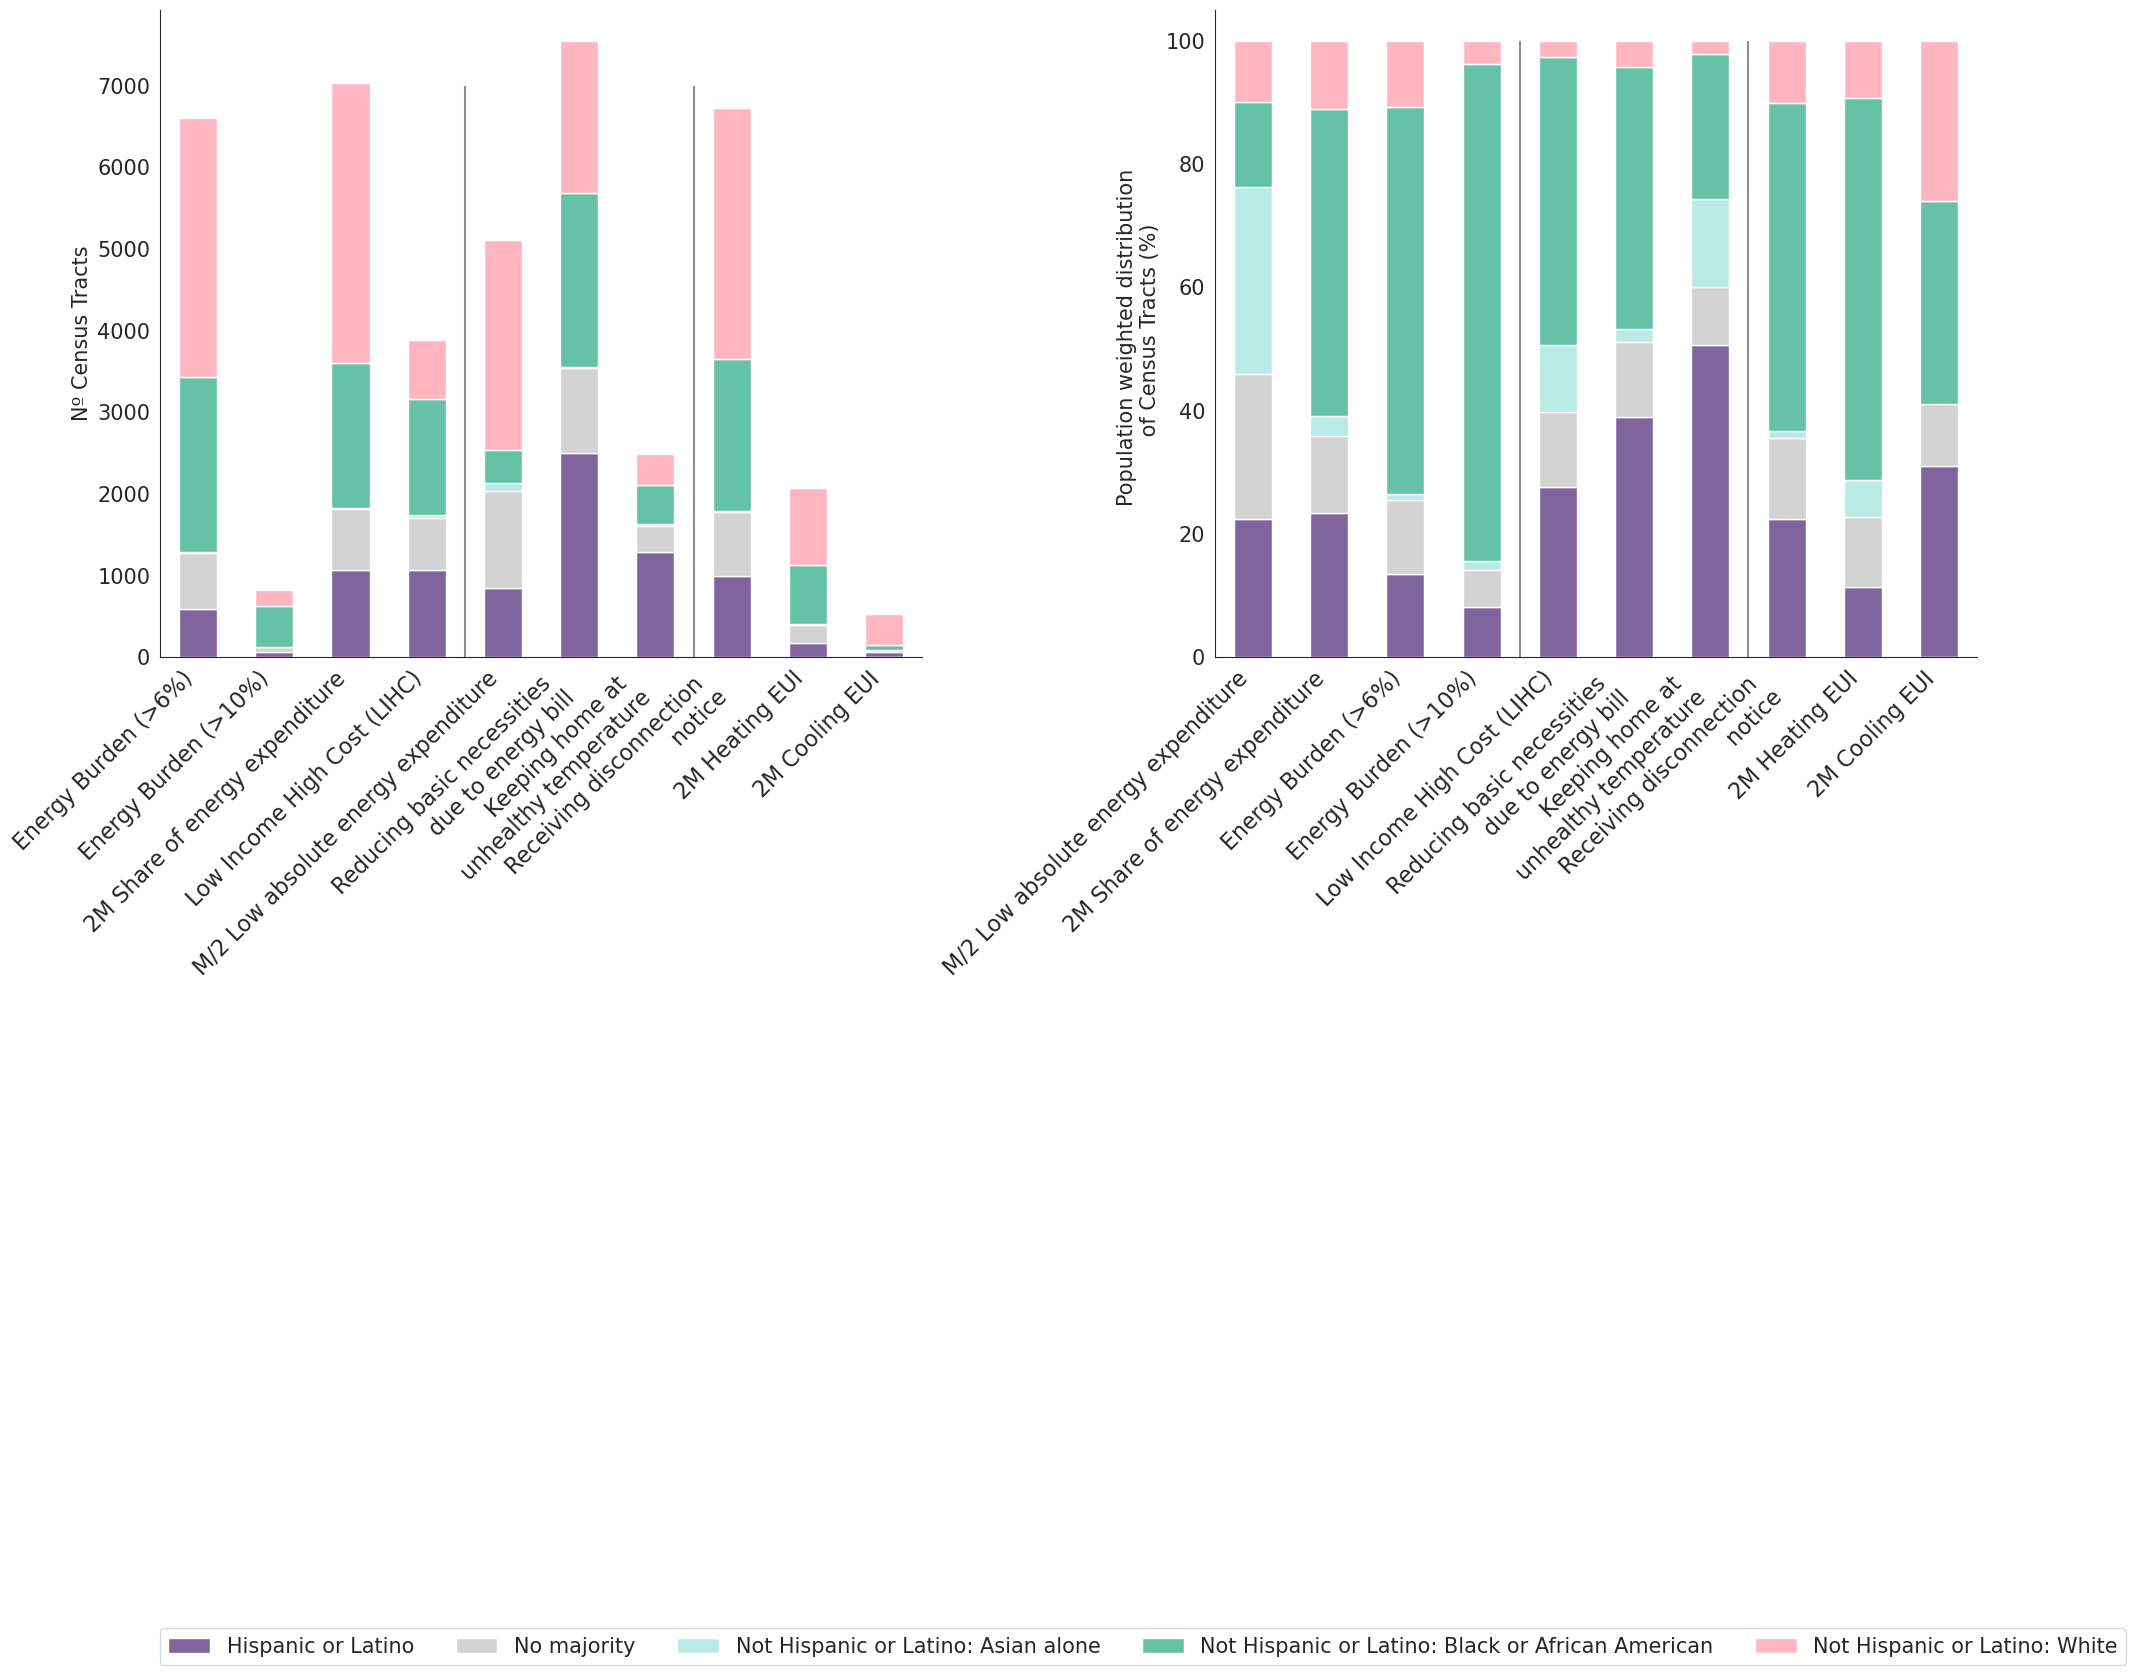

In [10]:
#FINAL FIGURE: MIX OF ABSOLUTE AND RELATIVE

#ABSOLUTE

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
fs_title = 15
fs = 15
#fig.suptitle('Economic energy insecurity indicators per householder gender', fontsize = fs_title)

#ax1 -In absolute terms, counts

subset_econcomic_acs[['Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 'Low Income High Cost (LIHC)',
       'M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI','Race_majority']].groupby(demo).sum().T.plot(kind='bar', stacked=True, 
                                                color =[palette_race[i] for i in order_race], ax = ax1)



#RELATIVE    
#aply weights
subset_econcomic_acs.loc[:,'M/2 Low absolute energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'M/2 Low absolute energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Share of energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'2M Share of energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>6%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>6%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>10%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>10%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Low Income High Cost (LIHC)_w']=subset_econcomic_acs_raw.loc[:,'Low Income High Cost (LIHC)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Reducing basic necessities \n due to energy bill_w']=subset_econcomic_acs_raw.loc[:,'Reducing basic necessities \n due to energy bill']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Keeping home at \n unhealthy temperature_w']=subset_econcomic_acs_raw.loc[:,'Keeping home at \n unhealthy temperature']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Receiving disconnection \n notice_w']=subset_econcomic_acs_raw.loc[:,'Receiving disconnection \n notice']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Heating EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Heating EUI']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Cooling EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Cooling EUI']/subset_econcomic_acs_raw.loc[:,"weights"]

df_plot = subset_econcomic_acs.copy()

#ax2 - In relative terms, %

df_plot.loc[:,"M/2 Low absolute energy expenditure"]=100*df_plot.loc[:,"M/2 Low absolute energy expenditure_w"]/df_plot.loc[:,'M/2 Low absolute energy expenditure_w'].values.sum()
df_plot.loc[:,"2M Share of energy expenditure"]=100*df_plot.loc[:,"2M Share of energy expenditure_w"]/df_plot.loc[:,'2M Share of energy expenditure_w'].values.sum()
df_plot.loc[:,"Energy Burden (>6%)"]=100*df_plot.loc[:,"Energy Burden (>6%)_w"]/df_plot.loc[:,'Energy Burden (>6%)_w'].values.sum()
df_plot.loc[:,"Energy Burden (>10%)"]=100*df_plot.loc[:,"Energy Burden (>10%)_w"]/df_plot.loc[:,'Energy Burden (>10%)_w'].values.sum()
df_plot.loc[:,"Low Income High Cost (LIHC)"]=100*df_plot.loc[:,"Low Income High Cost (LIHC)_w"]/df_plot.loc[:,'Low Income High Cost (LIHC)_w'].values.sum()
df_plot.loc[:,"Reducing basic necessities \n due to energy bill"]=100*df_plot.loc[:,"Reducing basic necessities \n due to energy bill_w"]/df_plot.loc[:,'Reducing basic necessities \n due to energy bill_w'].values.sum()
df_plot.loc[:,"Keeping home at \n unhealthy temperature"]=100*df_plot.loc[:,"Keeping home at \n unhealthy temperature_w"]/df_plot.loc[:,'Keeping home at \n unhealthy temperature_w'].values.sum()
df_plot.loc[:,"Receiving disconnection \n notice"]=100*df_plot.loc[:,"Receiving disconnection \n notice_w"]/df_plot.loc[:,'Receiving disconnection \n notice_w'].values.sum()
df_plot.loc[:,"2M Heating EUI"]=100*df_plot.loc[:,"2M Heating EUI_w"]/df_plot.loc[:,'2M Heating EUI_w'].values.sum()
df_plot.loc[:,"2M Cooling EUI"]=100*df_plot.loc[:,"2M Cooling EUI_w"]/df_plot.loc[:,'2M Cooling EUI_w'].values.sum()

df_plot[[demo,"M/2 Low absolute energy expenditure", "2M Share of energy expenditure", 
                      "Energy Burden (>6%)", "Energy Burden (>10%)","Low Income High Cost (LIHC)",
                     "Reducing basic necessities \n due to energy bill","Keeping home at \n unhealthy temperature",
                      "Receiving disconnection \n notice" , '2M Heating EUI', '2M Cooling EUI']].groupby(demo).sum().T.plot(kind='bar', stacked=True, color =[palette_race[i] for i in order_race], ax=ax2, legend=None)

plt.setp(ax1.get_yticklabels(), fontsize = fs)
plt.setp(ax2.get_yticklabels(), fontsize = fs)

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

ax1.set_ylabel("Nº Census Tracts",fontsize=fs)
ax2.set_ylabel("Population weighted distribution \n of Census Tracts (%)",fontsize=fs)

plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
plt.tight_layout()
sns.despine()

for i in [3,6]:
    ax1.vlines(i+.5, 0, 7000, linestyles='solid', colors='gray', alpha=0.9)
    ax2.vlines(i+.5, 0, 100, linestyles='solid', colors='gray', alpha=0.9)


ax1.legend(bbox_to_anchor=(0, -1.5), loc=2, borderaxespad=0., ncol=5, fontsize = fs)
#ax1.legend("")
plt.tight_layout()
#plt.savefig('economic_indic_q2_gender.png', bbox_inches='tight')

In [11]:
subset_econcomic_acs[[demo,"M/2 Low absolute energy expenditure", "2M Share of energy expenditure", 
                      "Energy Burden (>6%)", "Energy Burden (>10%)","Low Income High Cost (LIHC)",
                     "Reducing basic necessities \n due to energy bill","Keeping home at \n unhealthy temperature",
                      "Receiving disconnection \n notice" , '2M Heating EUI', '2M Cooling EUI']].groupby(demo).sum()

,M/2 Low absolute energy expenditure,2M Share of energy expenditure,Energy Burden (>6%),Energy Burden (>10%),Low Income High Cost (LIHC),Reducing basic necessities \n due to energy bill,Keeping home at \n unhealthy temperature,Receiving disconnection \n notice,2M Heating EUI,2M Cooling EUI
Race_majority,,,,,,,,,,
Hispanic or Latino,847,1063,589,64,1068,2499,1283,999,170,66
No majority,1189,756,692,63,636,1043,322,784,227,29
Not Hispanic or Latino: Asian alone,102,13,4,1,37,12,32,4,8,0
Not Hispanic or Latino: Black or African American,405,1772,2142,496,1423,2137,469,1863,728,55
Not Hispanic or Latino: White,2570,3432,3180,203,717,1859,384,3074,937,378


### GENDER

In [12]:
#For dependency level, drop NaNs:
demo = 'Householder_binary'
acs_data_raw.dropna(subset=[demo], inplace = True)


subset_demo = acs_data_raw.groupby(demo).count().unstack()
tot_demo = subset_demo['GEOID'].sum()


In [13]:
weights_inv = dict(subset_demo['GEOID']/tot_demo)
acs_data_raw.loc[:,"weights"] = acs_data_raw[demo].map(weights_inv)

acs_data_raw['Reducing basic necessities \n due to energy bill'] = np.where(acs_data_raw['Reducing basic necessities due to energy bill']==1, 'Yes', 'No')
acs_data_raw['Keeping home at \n unhealthy temperature'] = np.where(acs_data_raw['Keeping home at unhealthy temperature']==1, 'Yes', 'No')
acs_data_raw['Receiving disconnection \n notice'] = np.where(acs_data_raw['Receiving disconnection notice']==1, 'Yes', 'No')

#select dataframe to plot
subset_econcomic_acs_raw = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI', "weights"]]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)
subset_econcomic_acs = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice','2M Heating EUI', '2M Cooling EUI']]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)

# Mapping "yes" to 1 and "no" to 0 in the entire DataFrame
subset_econcomic_acs.replace({'Yes': 1, 'No': 0}, inplace=True)
subset_econcomic_acs_raw.replace({'Yes': 1, 'No': 0}, inplace=True)


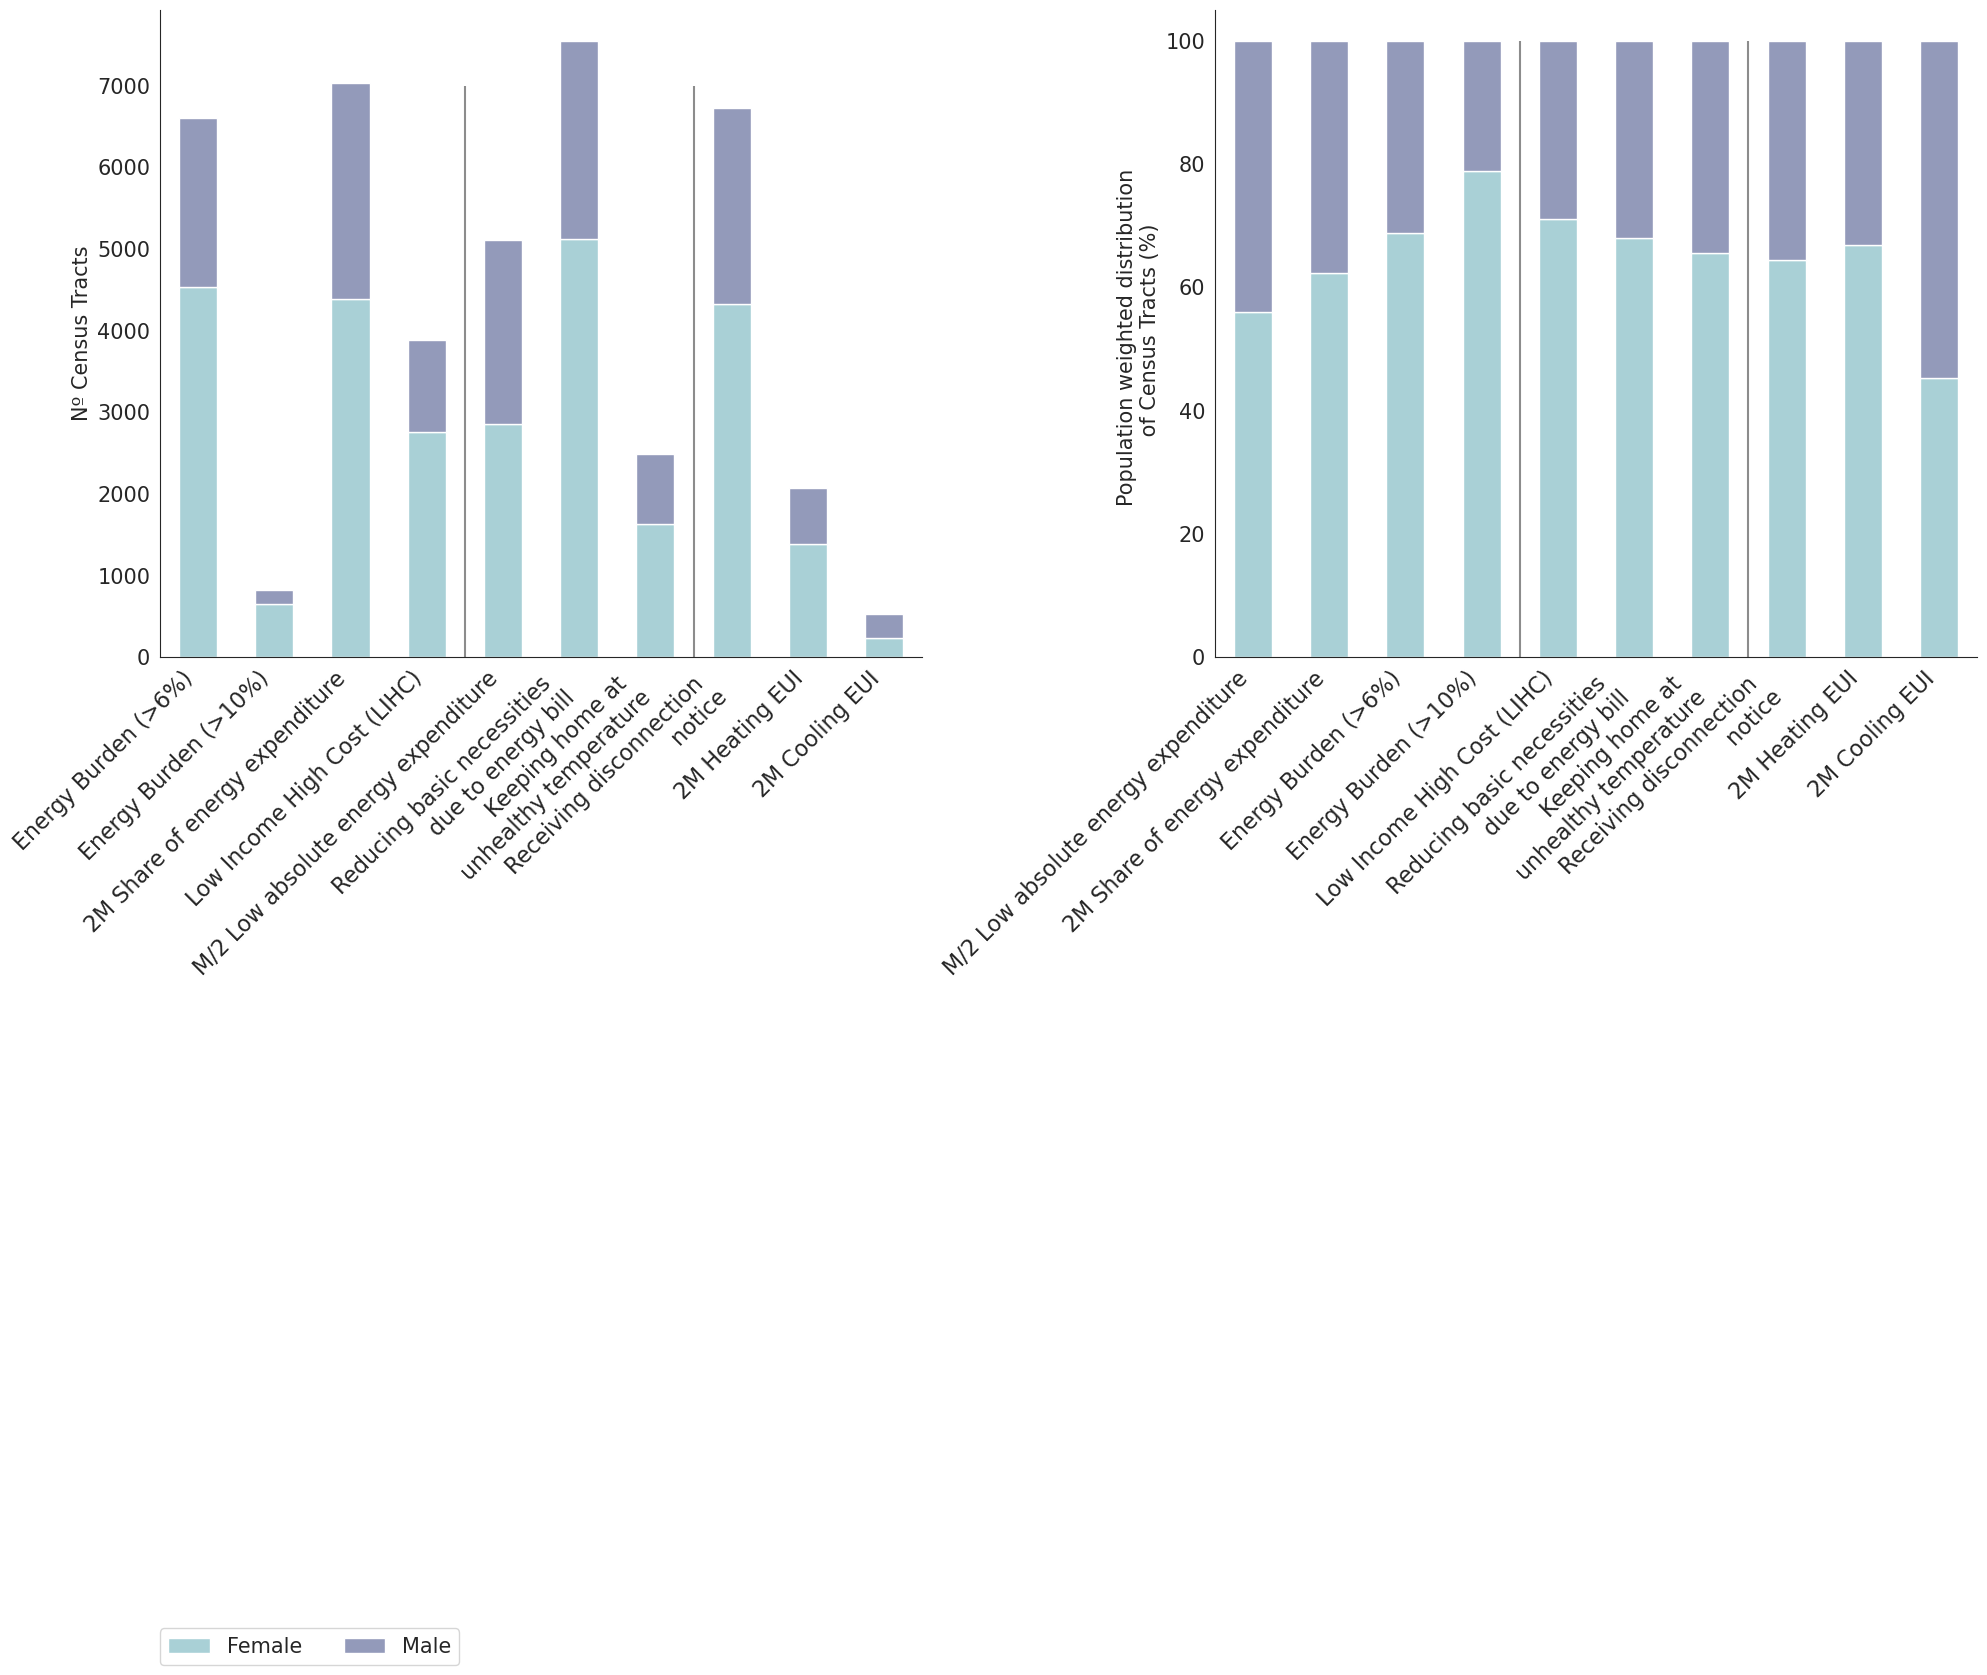

In [14]:

#ABSOLUTE

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
fs_title = 15
fs = 15
#fig.suptitle('Economic energy insecurity indicators per householder gender', fontsize = fs_title)

#ax1 -In absolute terms, counts ----------------------------------

subset_econcomic_acs[['Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 'Low Income High Cost (LIHC)',
       'M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI','Householder_binary']].groupby(demo).sum().T.plot(kind='bar', stacked=True, 
                                                color =[palette_gender[i] for i in order_gender], ax = ax1)



#RELATIVE    
#aply weights
subset_econcomic_acs.loc[:,'M/2 Low absolute energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'M/2 Low absolute energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Share of energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'2M Share of energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>6%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>6%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>10%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>10%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Low Income High Cost (LIHC)_w']=subset_econcomic_acs_raw.loc[:,'Low Income High Cost (LIHC)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Reducing basic necessities \n due to energy bill_w']=subset_econcomic_acs_raw.loc[:,'Reducing basic necessities \n due to energy bill']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Keeping home at \n unhealthy temperature_w']=subset_econcomic_acs_raw.loc[:,'Keeping home at \n unhealthy temperature']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Receiving disconnection \n notice_w']=subset_econcomic_acs_raw.loc[:,'Receiving disconnection \n notice']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Heating EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Heating EUI']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Cooling EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Cooling EUI']/subset_econcomic_acs_raw.loc[:,"weights"]

df_plot = subset_econcomic_acs.copy()

#ax2 - In relative terms, gender %


df_plot.loc[:,"M/2 Low absolute energy expenditure"]=100*df_plot.loc[:,"M/2 Low absolute energy expenditure_w"]/df_plot.loc[:,'M/2 Low absolute energy expenditure_w'].values.sum()
df_plot.loc[:,"2M Share of energy expenditure"]=100*df_plot.loc[:,"2M Share of energy expenditure_w"]/df_plot.loc[:,'2M Share of energy expenditure_w'].values.sum()
df_plot.loc[:,"Energy Burden (>6%)"]=100*df_plot.loc[:,"Energy Burden (>6%)_w"]/df_plot.loc[:,'Energy Burden (>6%)_w'].values.sum()
df_plot.loc[:,"Energy Burden (>10%)"]=100*df_plot.loc[:,"Energy Burden (>10%)_w"]/df_plot.loc[:,'Energy Burden (>10%)_w'].values.sum()
df_plot.loc[:,"Low Income High Cost (LIHC)"]=100*df_plot.loc[:,"Low Income High Cost (LIHC)_w"]/df_plot.loc[:,'Low Income High Cost (LIHC)_w'].values.sum()
df_plot.loc[:,"Reducing basic necessities \n due to energy bill"]=100*df_plot.loc[:,"Reducing basic necessities \n due to energy bill_w"]/df_plot.loc[:,'Reducing basic necessities \n due to energy bill_w'].values.sum()
df_plot.loc[:,"Keeping home at \n unhealthy temperature"]=100*df_plot.loc[:,"Keeping home at \n unhealthy temperature_w"]/df_plot.loc[:,'Keeping home at \n unhealthy temperature_w'].values.sum()
df_plot.loc[:,"Receiving disconnection \n notice"]=100*df_plot.loc[:,"Receiving disconnection \n notice_w"]/df_plot.loc[:,'Receiving disconnection \n notice_w'].values.sum()
df_plot.loc[:,"2M Heating EUI"]=100*df_plot.loc[:,"2M Heating EUI_w"]/df_plot.loc[:,'2M Heating EUI_w'].values.sum()
df_plot.loc[:,"2M Cooling EUI"]=100*df_plot.loc[:,"2M Cooling EUI_w"]/df_plot.loc[:,'2M Cooling EUI_w'].values.sum()

df_plot[[demo,"M/2 Low absolute energy expenditure", "2M Share of energy expenditure", 
                      "Energy Burden (>6%)", "Energy Burden (>10%)","Low Income High Cost (LIHC)",
                     "Reducing basic necessities \n due to energy bill","Keeping home at \n unhealthy temperature",
                      "Receiving disconnection \n notice" , '2M Heating EUI', '2M Cooling EUI']].groupby(demo).sum().T.plot(kind='bar', stacked=True, color =[palette_gender[i] for i in order_gender], ax=ax2, legend=None)

# ----------------------------------



plt.setp(ax1.get_yticklabels(), fontsize = fs)
plt.setp(ax2.get_yticklabels(), fontsize = fs)

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

ax1.set_ylabel("Nº Census Tracts",fontsize=fs)
ax2.set_ylabel("Population weighted distribution \n of Census Tracts (%)",fontsize=fs)

plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
plt.tight_layout()
sns.despine()

for i in [3,6]:
    ax1.vlines(i+.5, 0, 7000, linestyles='solid', colors='gray', alpha=0.9)
    ax2.vlines(i+.5, 0, 100, linestyles='solid', colors='gray', alpha=0.9)


ax1.legend(bbox_to_anchor=(0, -1.5), loc=2, borderaxespad=0., ncol=5, fontsize = fs)
#ax1.legend("")


plt.tight_layout()


In [15]:
subset_econcomic_acs[[demo,"M/2 Low absolute energy expenditure", "2M Share of energy expenditure", 
                      "Energy Burden (>6%)", "Energy Burden (>10%)","Low Income High Cost (LIHC)",
                     "Reducing basic necessities \n due to energy bill","Keeping home at \n unhealthy temperature",
                      "Receiving disconnection \n notice" , '2M Heating EUI', '2M Cooling EUI']].groupby(demo).sum()

,M/2 Low absolute energy expenditure,2M Share of energy expenditure,Energy Burden (>6%),Energy Burden (>10%),Low Income High Cost (LIHC),Reducing basic necessities \n due to energy bill,Keeping home at \n unhealthy temperature,Receiving disconnection \n notice,2M Heating EUI,2M Cooling EUI
Householder_binary,,,,,,,,,,
Female,2860,4385,4537,652,2759,5125,1631,4327,1381,239
Male,2253,2651,2070,175,1122,2425,859,2397,689,289


# Final figure

Text(0.5, 0.2, '$\\mathbf{m1}$: Energy Burden (>6%), $\\mathbf{m2}$: Energy Burden (>10%), $\\mathbf{m3}$: 2M Share of energy expenditure, $\\mathbf{m4}$: Low Income High Cost (LIHC)\n$\\mathbf{m5}$: M/2 Low absolute energy expenditure, $\\mathbf{m6}$: Reducing basic necessities due to energy bill, $\\mathbf{m7}$: Keeping home at unhealthy temperature, $\\mathbf{m8}$: Receiving disconnection notice\n$\\mathbf{m9}$: 2M Heating EUI, $\\mathbf{m10}$: 2M Cooling EUI')

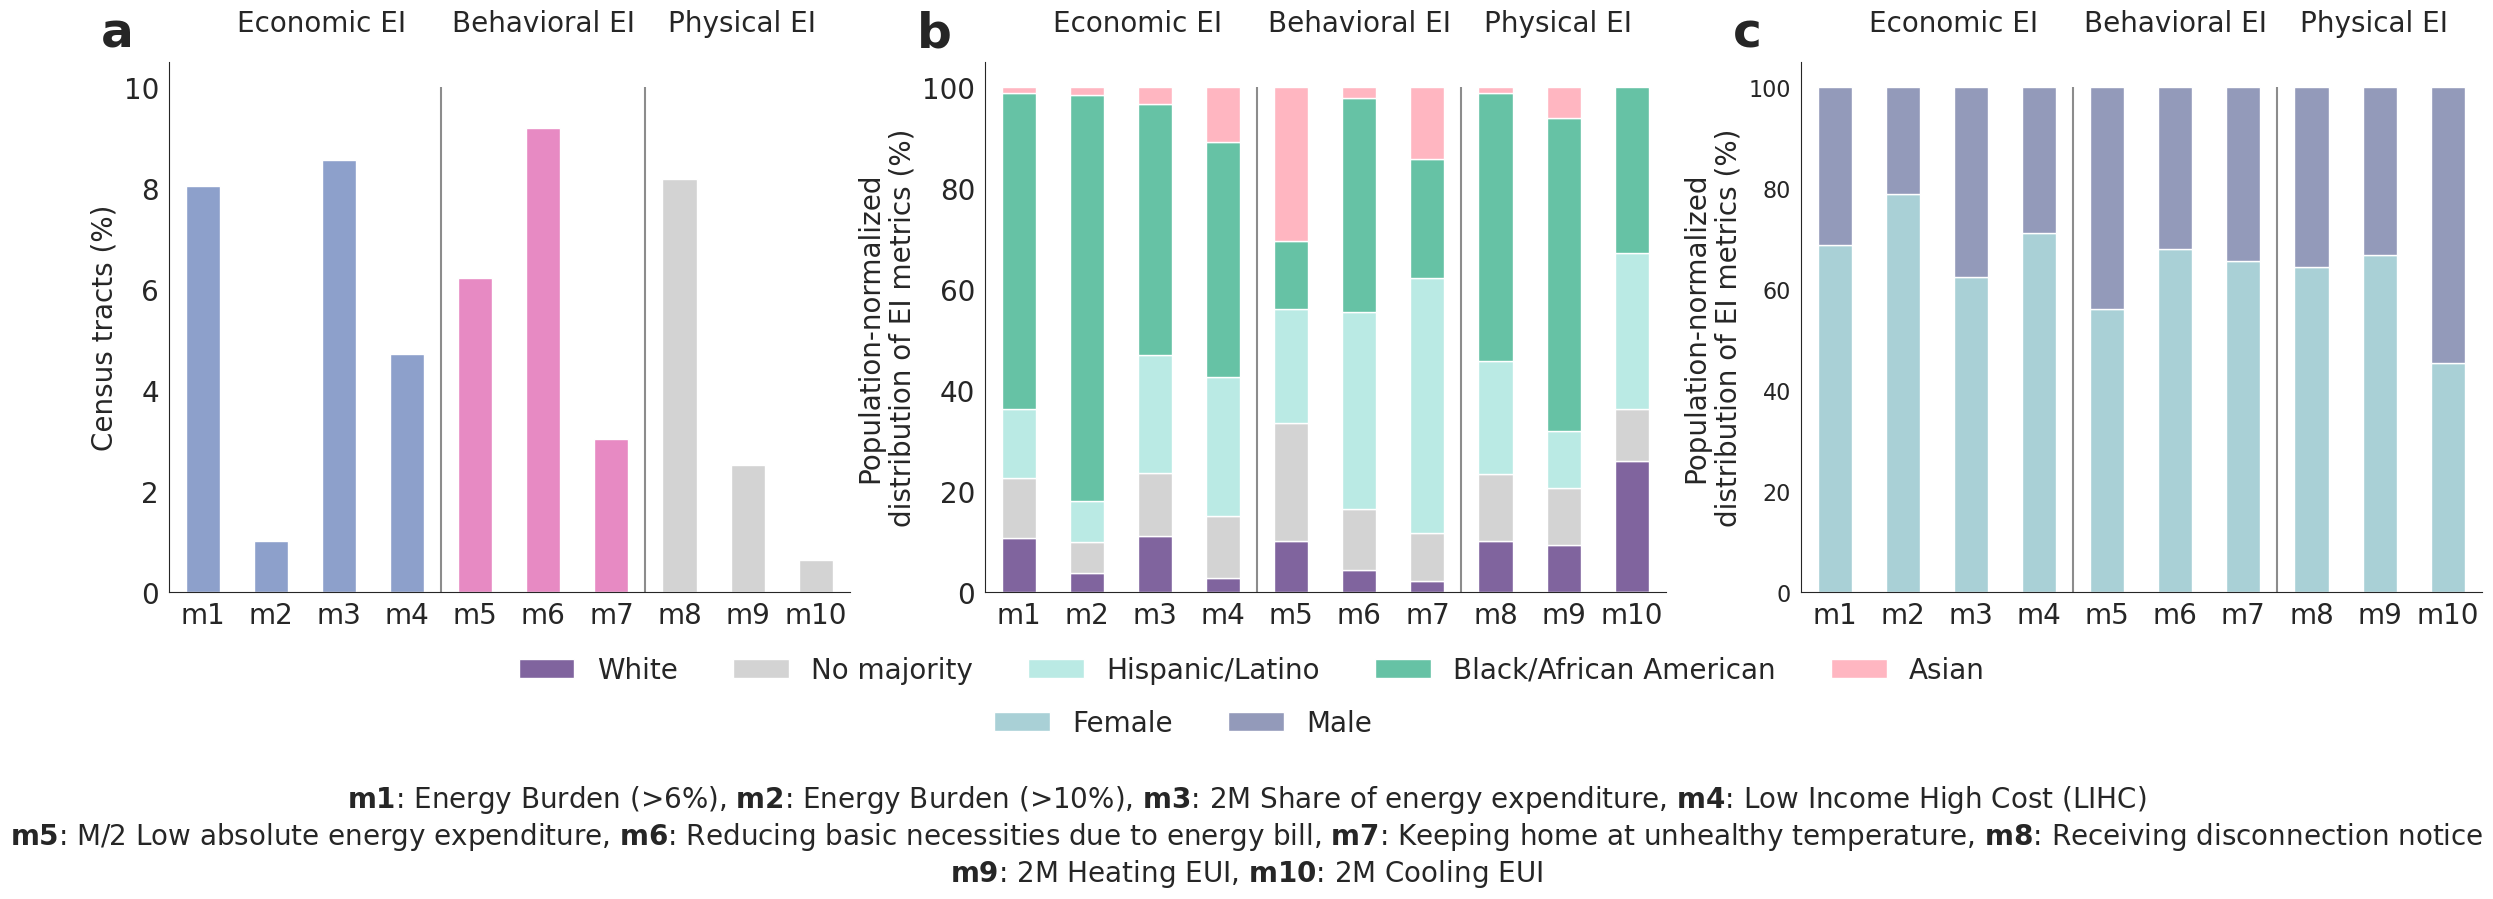

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(25,10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
fs_title = 25
fs = 20
fs_head = 20
#fig.suptitle('Economic energy insecurity indicators per householder gender', fontsize = fs_title)

#ax1 -In absolute terms, counts
total_tracts = len(subset_econcomic_acs)

subset_econcomic_acs[['Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 'Low Income High Cost (LIHC)',
       'M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI']].sum().div(total_tracts).mul(100).plot(
    kind='bar', color=[econ_col, econ_col, econ_col, econ_col, 
                         beh_col, beh_col, beh_col,
                        physical_col, physical_col, physical_col], ax=ax1) #color = 'lightgrey'

#RELATIVE    
#aply weights
subset_econcomic_acs.loc[:,'M/2 Low absolute energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'M/2 Low absolute energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Share of energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'2M Share of energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>6%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>6%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>10%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>10%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Low Income High Cost (LIHC)_w']=subset_econcomic_acs_raw.loc[:,'Low Income High Cost (LIHC)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Reducing basic necessities \n due to energy bill_w']=subset_econcomic_acs_raw.loc[:,'Reducing basic necessities \n due to energy bill']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Keeping home at \n unhealthy temperature_w']=subset_econcomic_acs_raw.loc[:,'Keeping home at \n unhealthy temperature']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Receiving disconnection \n notice_w']=subset_econcomic_acs_raw.loc[:,'Receiving disconnection \n notice']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Heating EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Heating EUI']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Cooling EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Cooling EUI']/subset_econcomic_acs_raw.loc[:,"weights"]

df_plot = subset_econcomic_acs.copy()

#ax3 - In relative terms, # ----------------------------------

df_plot.loc[:,"M/2 Low absolute energy expenditure"]=100*df_plot.loc[:,"M/2 Low absolute energy expenditure_w"]/df_plot.loc[:,'M/2 Low absolute energy expenditure_w'].values.sum()
df_plot.loc[:,"2M Share of energy expenditure"]=100*df_plot.loc[:,"2M Share of energy expenditure_w"]/df_plot.loc[:,'2M Share of energy expenditure_w'].values.sum()
df_plot.loc[:,"Energy Burden (>6%)"]=100*df_plot.loc[:,"Energy Burden (>6%)_w"]/df_plot.loc[:,'Energy Burden (>6%)_w'].values.sum()
df_plot.loc[:,"Energy Burden (>10%)"]=100*df_plot.loc[:,"Energy Burden (>10%)_w"]/df_plot.loc[:,'Energy Burden (>10%)_w'].values.sum()
df_plot.loc[:,"Low Income High Cost (LIHC)"]=100*df_plot.loc[:,"Low Income High Cost (LIHC)_w"]/df_plot.loc[:,'Low Income High Cost (LIHC)_w'].values.sum()
df_plot.loc[:,"Reducing basic necessities \n due to energy bill"]=100*df_plot.loc[:,"Reducing basic necessities \n due to energy bill_w"]/df_plot.loc[:,'Reducing basic necessities \n due to energy bill_w'].values.sum()
df_plot.loc[:,"Keeping home at \n unhealthy temperature"]=100*df_plot.loc[:,"Keeping home at \n unhealthy temperature_w"]/df_plot.loc[:,'Keeping home at \n unhealthy temperature_w'].values.sum()
df_plot.loc[:,"Receiving disconnection \n notice"]=100*df_plot.loc[:,"Receiving disconnection \n notice_w"]/df_plot.loc[:,'Receiving disconnection \n notice_w'].values.sum()
df_plot.loc[:,"2M Heating EUI"]=100*df_plot.loc[:,"2M Heating EUI_w"]/df_plot.loc[:,'2M Heating EUI_w'].values.sum()
df_plot.loc[:,"2M Cooling EUI"]=100*df_plot.loc[:,"2M Cooling EUI_w"]/df_plot.loc[:,'2M Cooling EUI_w'].values.sum()

# Plot for Gender (ax3) - Reordered to match palette_gender and order_gender
df_gender = (
    df_plot[[demo, "Energy Burden (>6%)", "Energy Burden (>10%)", "2M Share of energy expenditure",
             "Low Income High Cost (LIHC)", "M/2 Low absolute energy expenditure",
             "Reducing basic necessities \n due to energy bill", "Keeping home at \n unhealthy temperature",
             "Receiving disconnection \n notice", "2M Heating EUI", "2M Cooling EUI"]]
    .groupby(demo).sum().T
)

df_gender = df_gender[order_gender]  # Align columns to match color palette
df_gender.plot(kind='bar', stacked=True, color=[palette_gender[i] for i in order_gender], ax=ax3, legend=None)

plt.setp(ax1.get_yticklabels(), fontsize = fs)
plt.setp(ax2.get_yticklabels(), fontsize = fs)

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

ax1.set_ylabel("Nº Census Tracts",fontsize=fs)
ax2.set_ylabel("Population-normalized\ndistribution of EI metrics (%)",fontsize=fs)
ax3.set_ylabel("Population-normalized\ndistribution of EI metrics (%)",fontsize=fs)



plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
plt.tight_layout()
sns.despine()

for i in [3,6]:
    ax1.vlines(i+.5, 0, 10, linestyles='solid', colors='gray', alpha=0.9)
    ax2.vlines(i+.5, 0, 100, linestyles='solid', colors='gray', alpha=0.9)
    ax3.vlines(i+.5, 0, 100, linestyles='solid', colors='gray', alpha=0.9)

energy_burden_dict = {
    'm1': 'Energy Burden (>6%)',
    'm2': 'Energy Burden (>10%)',
    'm3': '2M Share of energy expenditure',
    'm4': 'Low Income High Cost (LIHC)',
    'm5': 'M/2 Low absolute energy expenditure',
    'm6': 'Reducing basic necessities due to energy bill',
    'm7': 'Keeping home at unhealthy temperature',
    'm8': 'Receiving disconnection notice',
    'm9': '2M Heating EUI',
    'm10': '2M Cooling EUI'
}

#ax2 - In relative terms, race% ----------------------------------

#prep
#For dependency level, drop NaNs:
demo = 'Race_majority'
acs_data_raw.dropna(subset=[demo], inplace = True)


subset_demo = acs_data_raw.groupby(demo).count().unstack()
tot_demo = subset_demo['GEOID'].sum()

weights_inv = dict(subset_demo['GEOID']/tot_demo)
acs_data_raw.loc[:,"weights"] = acs_data_raw[demo].map(weights_inv)

acs_data_raw['Reducing basic necessities \n due to energy bill'] = np.where(acs_data_raw['Reducing basic necessities due to energy bill']==1, 'Yes', 'No')
acs_data_raw['Keeping home at \n unhealthy temperature'] = np.where(acs_data_raw['Keeping home at unhealthy temperature']==1, 'Yes', 'No')
acs_data_raw['Receiving disconnection \n notice'] = np.where(acs_data_raw['Receiving disconnection notice']==1, 'Yes', 'No')

#select dataframe to plot
subset_econcomic_acs_raw = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI', "weights"]]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)
subset_econcomic_acs = acs_data_raw[[demo, 'Energy Burden (>6%)', 'Energy Burden (>10%)',
       '2M Share of energy expenditure', 
       'Low Income High Cost (LIHC)','M/2 Low absolute energy expenditure',
       'Reducing basic necessities \n due to energy bill',
       'Keeping home at \n unhealthy temperature',
       'Receiving disconnection \n notice','2M Heating EUI', '2M Cooling EUI']]#acs_data_raw[["Race_majority","boolean_EB", "boolean_2M", "boolean_LIHC", "boolean_M/2", "boolean_LIHC"]].set_index('Race_majority').T.plot(kind='bar', stacked=True)

# Mapping "yes" to 1 and "no" to 0 in the entire DataFrame
subset_econcomic_acs.replace({'Yes': 1, 'No': 0}, inplace=True)
subset_econcomic_acs_raw.replace({'Yes': 1, 'No': 0}, inplace=True)

#subset_econcomic_acs[['Energy Burden (>6%)', 'Energy Burden (>10%)',
#       '2M Share of energy expenditure', 'Low Income High Cost (LIHC)',
#       'M/2 Low absolute energy expenditure',
#       'Reducing basic necessities \n due to energy bill',
#       'Keeping home at \n unhealthy temperature',
 #      'Receiving disconnection \n notice', '2M Heating EUI', '2M Cooling EUI','Race_majority']].groupby(demo).sum().T.plot(kind='bar', stacked=True, 
  #                                              color =[palette_race[i] for i in order_race], ax = ax1)
#


#RELATIVE    
#aply weights
subset_econcomic_acs.loc[:,'M/2 Low absolute energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'M/2 Low absolute energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Share of energy expenditure_w']=subset_econcomic_acs_raw.loc[:,'2M Share of energy expenditure']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>6%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>6%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Energy Burden (>10%)_w']=subset_econcomic_acs_raw.loc[:,'Energy Burden (>10%)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Low Income High Cost (LIHC)_w']=subset_econcomic_acs_raw.loc[:,'Low Income High Cost (LIHC)']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Reducing basic necessities \n due to energy bill_w']=subset_econcomic_acs_raw.loc[:,'Reducing basic necessities \n due to energy bill']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Keeping home at \n unhealthy temperature_w']=subset_econcomic_acs_raw.loc[:,'Keeping home at \n unhealthy temperature']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'Receiving disconnection \n notice_w']=subset_econcomic_acs_raw.loc[:,'Receiving disconnection \n notice']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Heating EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Heating EUI']/subset_econcomic_acs_raw.loc[:,"weights"]
subset_econcomic_acs.loc[:,'2M Cooling EUI_w']=subset_econcomic_acs_raw.loc[:,'2M Cooling EUI']/subset_econcomic_acs_raw.loc[:,"weights"]


df_plot = subset_econcomic_acs.copy()
#plot
df_plot.loc[:,"M/2 Low absolute energy expenditure"]=100*df_plot.loc[:,"M/2 Low absolute energy expenditure_w"]/df_plot.loc[:,'M/2 Low absolute energy expenditure_w'].values.sum()
df_plot.loc[:,"2M Share of energy expenditure"]=100*df_plot.loc[:,"2M Share of energy expenditure_w"]/df_plot.loc[:,'2M Share of energy expenditure_w'].values.sum()
df_plot.loc[:,"Energy Burden (>6%)"]=100*df_plot.loc[:,"Energy Burden (>6%)_w"]/df_plot.loc[:,'Energy Burden (>6%)_w'].values.sum()
df_plot.loc[:,"Energy Burden (>10%)"]=100*df_plot.loc[:,"Energy Burden (>10%)_w"]/df_plot.loc[:,'Energy Burden (>10%)_w'].values.sum()
df_plot.loc[:,"Low Income High Cost (LIHC)"]=100*df_plot.loc[:,"Low Income High Cost (LIHC)_w"]/df_plot.loc[:,'Low Income High Cost (LIHC)_w'].values.sum()
df_plot.loc[:,"Reducing basic necessities \n due to energy bill"]=100*df_plot.loc[:,"Reducing basic necessities \n due to energy bill_w"]/df_plot.loc[:,'Reducing basic necessities \n due to energy bill_w'].values.sum()
df_plot.loc[:,"Keeping home at \n unhealthy temperature"]=100*df_plot.loc[:,"Keeping home at \n unhealthy temperature_w"]/df_plot.loc[:,'Keeping home at \n unhealthy temperature_w'].values.sum()
df_plot.loc[:,"Receiving disconnection \n notice"]=100*df_plot.loc[:,"Receiving disconnection \n notice_w"]/df_plot.loc[:,'Receiving disconnection \n notice_w'].values.sum()
df_plot.loc[:,"2M Heating EUI"]=100*df_plot.loc[:,"2M Heating EUI_w"]/df_plot.loc[:,'2M Heating EUI_w'].values.sum()
df_plot.loc[:,"2M Cooling EUI"]=100*df_plot.loc[:,"2M Cooling EUI_w"]/df_plot.loc[:,'2M Cooling EUI_w'].values.sum()


# Plot for Race (ax2) - Reordered to match palette_race and order_race
df_race = (
    df_plot[[demo, "Energy Burden (>6%)", "Energy Burden (>10%)", "2M Share of energy expenditure",
             "Low Income High Cost (LIHC)", "M/2 Low absolute energy expenditure",
             "Reducing basic necessities \n due to energy bill", "Keeping home at \n unhealthy temperature",
             "Receiving disconnection \n notice", "2M Heating EUI", "2M Cooling EUI"]]
    .groupby(demo).sum().T
)

df_race = df_race[order_race]  # Align columns to match color palette
df_race.plot(kind='bar', stacked=True, color=[palette_race[i] for i in order_race], ax=ax2, legend=None)

# ----------------------------------


#ax1.legend(bbox_to_anchor=(0, -1.5), loc=2, borderaxespad=0., ncol=5, fontsize = fs)
#ax1.legend("")

ax1.set_xticklabels(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'], rotation=0,fontsize = fs_head, ha='center' )
ax2.set_xticklabels(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'], rotation=0,fontsize = fs_head, ha='center')
ax3.set_xticklabels(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'], rotation=0,fontsize = fs_head, ha='center')

# ----------------------------------

ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
ax3.text(-0.1, 1.1, 'c', transform=ax3.transAxes, fontsize=35, fontweight='bold', va='top', ha='left')
# ----------------------------------


ax1.text(0.1, 1.1, 'Economic EI', transform=ax1.transAxes, fontsize=fs_head, va='top', ha='left')
ax1.text(0.55, 1.1, 'Behavioral EI', transform=ax1.transAxes, fontsize=fs_head, va='top', ha='center')
ax1.text(0.95, 1.1, 'Physical EI', transform=ax1.transAxes, fontsize=fs_head, va='top', ha='right')

ax2.text(0.1, 1.1, 'Economic EI', transform=ax2.transAxes, fontsize=fs_head, va='top', ha='left')
ax2.text(0.55, 1.1, 'Behavioral EI', transform=ax2.transAxes, fontsize=fs_head, va='top', ha='center')
ax2.text(0.95, 1.1, 'Physical EI', transform=ax2.transAxes, fontsize=fs_head, va='top', ha='right')

ax3.text(0.1, 1.1, 'Economic EI', transform=ax3.transAxes, fontsize=fs_head, va='top', ha='left')
ax3.text(0.55, 1.1, 'Behavioral EI', transform=ax3.transAxes, fontsize=fs_head, va='top', ha='center')
ax3.text(0.95, 1.1, 'Physical EI', transform=ax3.transAxes, fontsize=fs_head, va='top', ha='right')

# ----------------------------------
race_mapping = {
    "Not Hispanic or Latino: White": "White",
    "No majority": "No majority",
    "Hispanic or Latino": "Hispanic/Latino",
    "Not Hispanic or Latino: Black or African American": "Black/African American",
    "Not Hispanic or Latino: Asian alone": "Asian"
}
handles, labels = ax2.get_legend_handles_labels()
new_labels = [race_mapping.get(label, label) for label in labels]
ax2.legend(handles, new_labels, bbox_to_anchor=(-0.7, -0.1), loc=2, borderaxespad=0., ncol=5, fontsize = fs,frameon=False)
ax3.legend(bbox_to_anchor=(-1.2, -0.2), loc=2, borderaxespad=0., ncol=5, fontsize = fs,frameon=False)


# ----------------------------------
ax1.set_ylabel("Census tracts (%)", fontsize=fs)

legend_lines = []
items_per_row = 4  # Adjust so that we have 5 rows for the total number of items

# Format each item with bold and italic for the number
formatted_items = [f"$\\mathbf{{{key}}}$: {value}" for key, value in energy_burden_dict.items()]

# Group items into rows of 4 to make 5 rows in total
for i in range(0, len(formatted_items), items_per_row):
    legend_lines.append(", ".join(formatted_items[i:i + items_per_row]))

    
# Combine rows with line breaks
legend_text = "\n".join(legend_lines)
# Add the legend text below the plot
fig.text(0.5, 0.2, legend_text, ha='center', va='center', fontsize=20, wrap=False)
#fig.savefig("fig_5.pdf", format="pdf", bbox_inches="tight")

In [148]:
fig.savefig("stacked_plots_dem.pdf", format="pdf", bbox_inches="tight")